In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm

from matplotlib import pyplot as plt
from scipy import stats

In [2]:
s17 = pd.read_csv('../data/serenelli2017/s17_SDSS.csv')
s17.head()

,KIC,Teff,eTeff,[M/H],e[M/H],Radius,+eRad,-eRad,syRad,Mass,...,-elogg,sylogg,rho,+erho,-erho,syrho,Age,+eAge,-eAge,syAge
0,1435467,6433.0,86.0,-0.028,0.099,1.693,0.015,-0.016,0.010,1.344,...,-0.006,0.002,0.27770,0.002376,-0.002391,0.001505,2.605,0.302,-0.293,0.215
1,2010607,6361.0,71.0,-0.070,0.100,2.410,0.100,-0.090,0.035,1.402,...,-0.027,0.003,0.09973,0.009867,-0.009399,0.001393,2.755,0.296,-0.301,0.184
2,2309595,5238.0,65.0,-0.095,0.101,2.423,0.076,-0.073,0.022,1.167,...,-0.008,0.002,0.08183,0.002543,-0.002494,0.000710,5.460,1.351,-1.023,0.422
3,2450729,6029.0,59.0,-0.212,0.100,1.758,0.059,-0.056,0.023,1.112,...,-0.021,0.006,0.20430,0.015940,-0.014980,0.002889,6.034,0.804,-0.718,0.550
4,2837475,6688.0,57.0,-0.015,0.100,1.710,0.022,-0.043,0.039,1.665,...,-0.011,0.006,0.33190,0.002563,-0.002835,0.006216,1.131,0.197,-0.181,0.221


In [3]:
obs = pd.read_csv('../data/stellr/inputs_DR14_ASPC.csv')
obs.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e
0,KIC5950854,5914.0347,134.60000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,0.009836,0,1,1
1,KIC7799349,4976.7870,82.60566,4.421854,0.138701,33.299,0.322,0.284619,0.029484,3.670984,0.007718,0,0,0
2,KIC5822889,5184.0103,94.43386,12.830989,0.707319,19.708,0.127,-0.026246,0.039186,3.401706,0.012167,0,0,0
3,KIC12069569,6062.4185,168.10576,7.144911,0.291244,44.687,2.162,-0.084244,0.066659,3.825712,0.060999,0,0,0
4,KIC6947945,5334.4380,103.46670,3.806103,0.153818,43.660,1.416,-0.041512,0.043107,3.794063,0.011004,0,0,0


In [4]:
obs = obs[(obs['on_grid_1e'] == 1) & (obs['bad_data'] == 0)]
obs.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,0.009836,0,1,1
8,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,0.012941,0,1,0
10,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,0.017045,0,1,0
15,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,0.095282,0,1,1
22,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,0.016897,0,1,1


In [5]:
pps = pd.read_csv('../modelling/final_models/population+sun_results/partial_pool/DR14_ASPC/population/stars/results.csv')
pps.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,0.787223,0.870010,0.932191,1182.432590,1325.201967,1289.535691,3596.869825,0.695978,0.996358,...,18353.225517,18353.225517,13966.672871,-0.287445,-0.020236,0.000529,0.000374,-0.155726,1.000357,0.071685
1,KIC3942719,1.796417,1.837445,1.862172,1885.696329,1763.440489,1762.516388,3411.294100,1.752855,1.888088,...,4668.850338,4668.850338,7267.573509,-0.402963,-0.184656,0.000853,0.000603,-0.291168,1.001412,0.058293
2,KIC4457351,1.741225,1.796926,1.832285,1503.245478,1196.521278,1196.521278,1783.365241,1.681358,1.867983,...,21261.185858,19673.544135,13897.731433,-0.343261,-0.165847,0.000322,0.000237,-0.257974,1.000359,0.046989
3,KIC3223000,0.237187,0.364823,0.500833,1987.754912,2009.834951,2009.834951,3181.722850,0.131731,0.607467,...,11060.280968,11060.280968,12442.207612,-0.257526,-0.002148,0.000653,0.000462,-0.134466,1.000941,0.068677
4,KIC7429287,1.412570,1.509902,1.579870,1290.288463,1152.759789,1152.759789,2422.706692,1.318755,1.650847,...,14087.436520,12870.852520,11811.771543,-0.423542,-0.160516,0.000593,0.000439,-0.289075,1.000391,0.070383


In [6]:
df = obs.merge(pps, on='name', how='left')
print(len(df))
df.head()

81


,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,...,18353.225517,18353.225517,13966.672871,-0.287445,-0.020236,0.000529,0.000374,-0.155726,1.000357,0.071685
1,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,...,4668.850338,4668.850338,7267.573509,-0.402963,-0.184656,0.000853,0.000603,-0.291168,1.001412,0.058293
2,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,...,21261.185858,19673.544135,13897.731433,-0.343261,-0.165847,0.000322,0.000237,-0.257974,1.000359,0.046989
3,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,...,11060.280968,11060.280968,12442.207612,-0.257526,-0.002148,0.000653,0.000462,-0.134466,1.000941,0.068677
4,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,...,14087.436520,12870.852520,11811.771543,-0.423542,-0.160516,0.000593,0.000439,-0.289075,1.000391,0.070383


In [7]:
df['KIC'] = df['name'].str.replace('KIC', '').astype(int)
df.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,KIC
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,...,18353.225517,13966.672871,-0.287445,-0.020236,0.000529,0.000374,-0.155726,1.000357,0.071685,5950854
1,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,...,4668.850338,7267.573509,-0.402963,-0.184656,0.000853,0.000603,-0.291168,1.001412,0.058293,3942719
2,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,...,19673.544135,13897.731433,-0.343261,-0.165847,0.000322,0.000237,-0.257974,1.000359,0.046989,4457351
3,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,...,11060.280968,12442.207612,-0.257526,-0.002148,0.000653,0.000462,-0.134466,1.000941,0.068677,3223000
4,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,...,12870.852520,11811.771543,-0.423542,-0.160516,0.000593,0.000439,-0.289075,1.000391,0.070383,7429287


In [8]:
df = df.merge(s17, on='KIC', how='left')
df.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg_x,...,-elogg,sylogg,rho,+erho,-erho,syrho,Age,+eAge,-eAge,syAge
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,...,-0.007,0.005,0.5096,0.002194,-0.002290,0.005988,9.164,1.302,-1.171,0.929
1,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,...,-0.010,0.003,0.1172,0.004284,-0.004270,0.001652,6.092,0.691,-0.650,0.366
2,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,...,-0.014,0.002,0.2086,0.010950,-0.010890,0.003579,13.110,1.455,-1.380,0.711
3,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,...,-0.011,0.006,0.6786,0.020150,-0.020920,0.004558,3.876,0.973,-0.946,1.045
4,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,...,-0.010,0.005,0.2784,0.008382,-0.008326,0.004884,10.550,1.235,-1.180,1.058


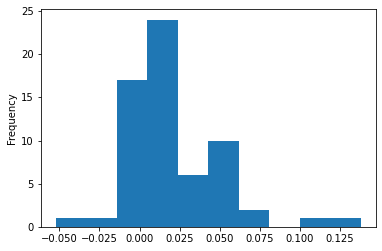

In [9]:
res = df['rad_mean'] - df['Radius']
res.plot(kind='hist')

In [10]:
z = np.linspace(-5, 5, 500)
n01 = stats.norm.pdf(z, 0., 1.)

In [11]:
def comp(true, loc, scale, ax=None, subplot_kwargs={}):
    if ax is None:
        fig, ax = plt.subplots(**subplot_kwargs)
    sns.distplot((df[loc] - df[true]) / df[scale], color='C0', vertical=True, ax=ax)
    ax.axhline(0.0, linestyle=':', color='grey')
#     ax.plot(n01, z, 'C1', label=r'$\mathcal{N}(0, 1)$')
    return ax

In [12]:
def get_y(true, loc, scale, true_err, loc_err):
    y = (df[loc] - df[true]) / df[scale]
    yerr = np.sqrt(df[loc_err]**2 + (df[loc]*df[true_err]/df[true])**2) / df[true]
    return y, yerr

In [39]:
def scatter(true, loc, scale, true_err, loc_err, ax=None, subplot_kwargs={}, label='PPS'):
    if ax is None:
        fig, ax = plt.subplots(**subplot_kwargs)
    yerr = np.sqrt(df[loc_err]**2 + (df[loc]*df[true_err]/df[true])**2) / df[true]
    ax.axhline(0.0, linestyle=':', color='grey')
    ax.errorbar(df[true], (df[loc] - df[true]) / df[scale], color='k',
                xerr=df[true_err], yerr=yerr, linestyle='none', capsize=2, marker='',
                label=label, zorder=0, elinewidth=0.5, capthick=.5, alpha=0.5)
    ax.scatter(df[true], (df[loc] - df[true]) / df[scale], marker='o', s=4, alpha=0.5)
    
#     mu = np.mean((df[loc] - df[true]) / df[scale])
#     sigma = np.std((df[loc] - df[true]) / df[scale])
    
    return ax

In [14]:
def dist(true, model, ax=None, subplot_kwargs={}, true_label='S17', model_label='PPS'):
    if ax is None:
        fig, ax = plt.subplots(**subplot_kwargs)
    sns.distplot(df[true], color='k', ax=ax, label=true_label)
    sns.distplot(df[model], color='C0', ax=ax, label=model_label)
    return ax

In [15]:
for col in ['Age', 'Mass', 'Radius']:
    c = col[:3]
    df['e'+c] = (df['+e'+c] - df['-e'+c]) / 2.

In [16]:
df.loc[df['KIC']==9025370, ['Age', 'age_mean']]

,Age,age_mean
7,7.002,1.024955


In [17]:
n = len(df.dropna())

In [18]:
def fit_normal(y_obs, y_err):
    with pm.Model() as model:
        mu = pm.Normal('mu', 0.0, 10.0)
        sigma = pm.Lognormal('sigma', np.log(1.0), 1.0)

        y_offset = pm.Normal('y_offset', 0.0, 1.0, shape=n)
        y = pm.Deterministic('y', mu + sigma * y_offset)

        like = pm.Normal('like', y, y_err, observed=y_obs)
        trace = pm.sample()
    return trace

In [19]:
def plot_comp(col):
    ax = df.plot(col, f'{col}_mean', xerr=f'{col}_err', yerr=f'{col}_sd', kind='scatter', figsize=(8, 8))
    z = [df[col].min(), df[col].max()]
    ax.plot(z, z, 'k--')
    return ax

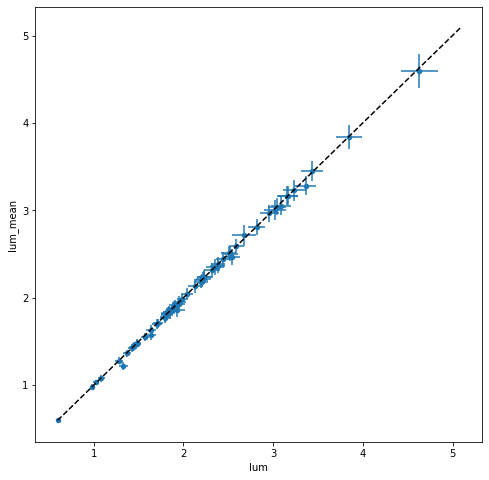

In [20]:
plot_comp('lum');

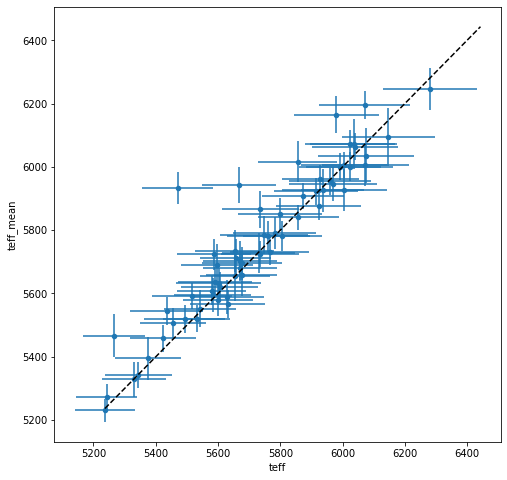

In [21]:
plot_comp('teff');

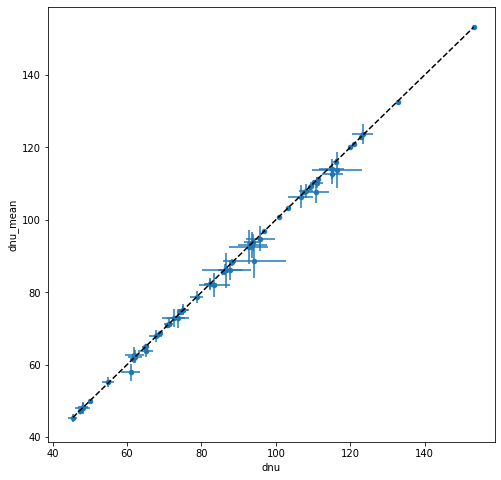

In [22]:
plot_comp('dnu');

In [23]:
df.loc[(df['dnu'] - df['dnu_mean']).idxmin(), ['Radius', 'rad_mean']]

Radius        1.758
rad_mean    1.76423
Name: 26, dtype: object

In [25]:
age_obs, age_err = get_y('Age', 'age_mean', 'Age', 'eAge', 'age_sd')
trace = fit_normal(age_obs.dropna(), age_err.dropna())

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_offset, sigma, mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 2540.35draws/s]


In [26]:
age = pm.summary(trace, round_to='none')

In [27]:
age.loc[['mu', 'sigma'], ['mean', 'sd']]

,mean,sd
mu,-0.043364,0.036302
sigma,0.180351,0.031499


In [45]:
plt.rc('lines', linewidth=1)

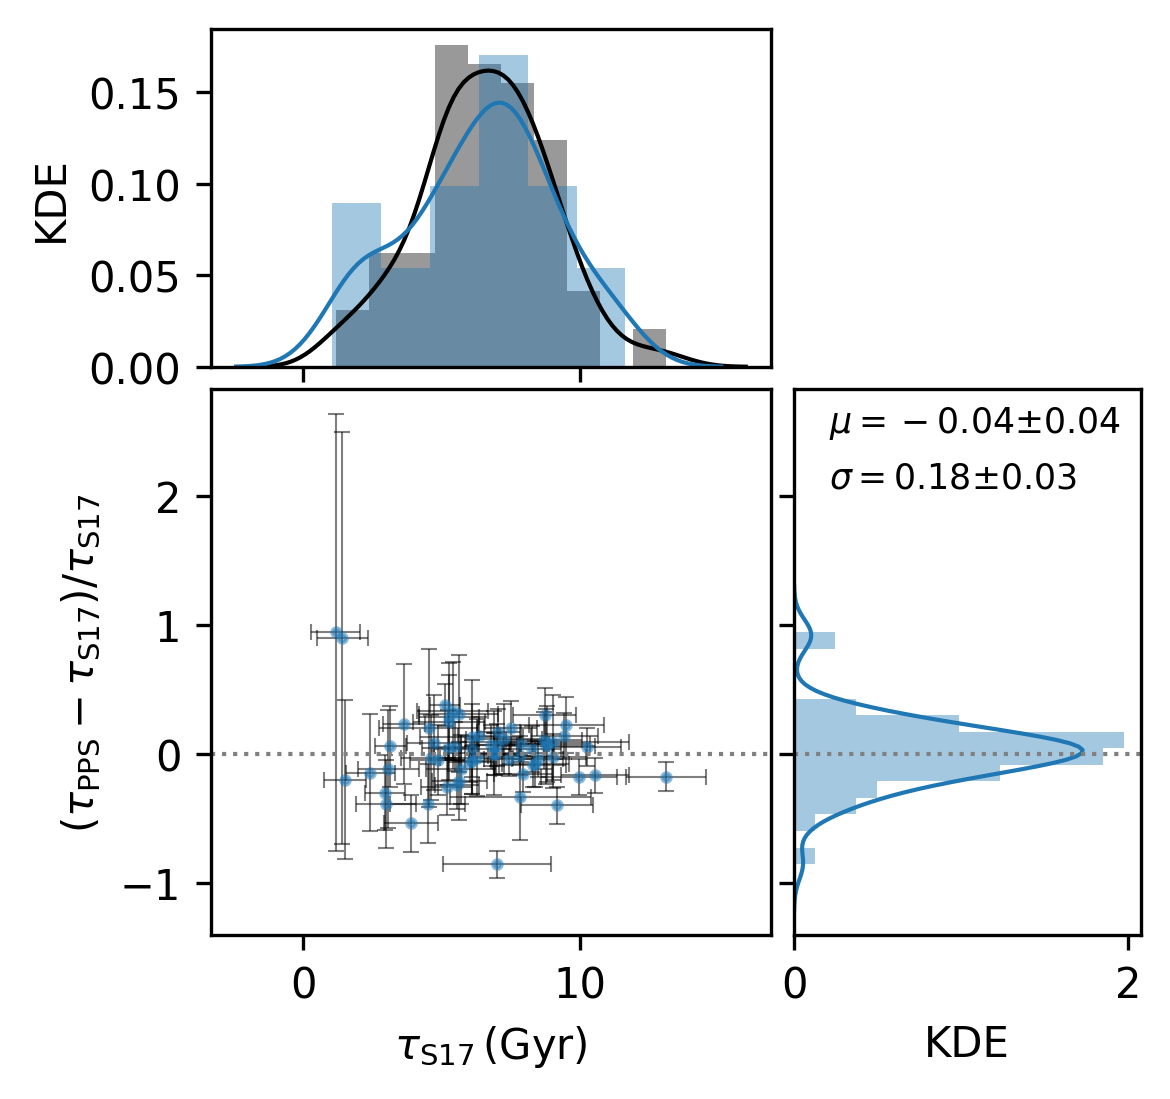

In [55]:
cols = ('Age', 'age_mean', 'Age')

fig, axes = plt.subplots(2, 2, figsize=(4., 4.), dpi=300, sharey='row', sharex='col',
                        gridspec_kw={'wspace': 0.05, 'hspace': 0.05, 
                                     'width_ratios': [1.618, 1.], 'height_ratios': [1., 1.618]})

dist(*cols[:2], ax=axes[0, 0])
scatter(*cols, '+eAge', 'age_sd', ax=axes[1, 0])
comp(*cols, ax=axes[1, 1])

axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('KDE')
# axes[0, 0].legend()

axes[0, 1].remove()

ax = axes[1, 1]
ax.text(.1, .92, r'$\mu='+f'{age.loc["mu", "mean"]:.2f}±{age.loc["mu", "sd"]:.2f}'+'$', 
                transform=ax.transAxes, fontdict={'fontsize': 'small'})
ax.text(.1, .82, r'$\sigma='+f'{age.loc["sigma", "mean"]:.2f}±{age.loc["sigma", "sd"]:.2f}'+'$', 
                transform=ax.transAxes, fontdict={'fontsize': 'small'})
axes[1, 0].set_ylabel(r'$(\tau_\mathrm{PPS} - \tau_\mathrm{S17}) / \tau_\mathrm{S17}$')
axes[1, 0].set_xlabel(r'$\tau_\mathrm{S17} \, (\mathrm{Gyr})$')
# axes[1, 0].legend()

axes[1, 1].set_xlabel('KDE')
# axes[1, 1].legend()

fig.savefig('../paper/figures/age_comp.png', bbox_inches='tight')

In [29]:
mass_obs, mass_err = get_y('Mass', 'mass_mean', 'Mass', 'eMas', 'mass_sd')
trace = fit_normal(mass_obs.dropna(), mass_err.dropna())
mass = pm.summary(trace, round_to='none')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_offset, sigma, mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1156.74draws/s]


In [30]:
mass.loc[['mu', 'sigma']]

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.010176,0.007170,-0.003740,0.023081,0.000136,0.000109,2786.773324,2149.113057,2775.401310,1739.095161,1.002692
sigma,0.020754,0.007038,0.008251,0.033950,0.000171,0.000121,1693.796070,1693.796070,1659.473764,1490.696033,0.999689


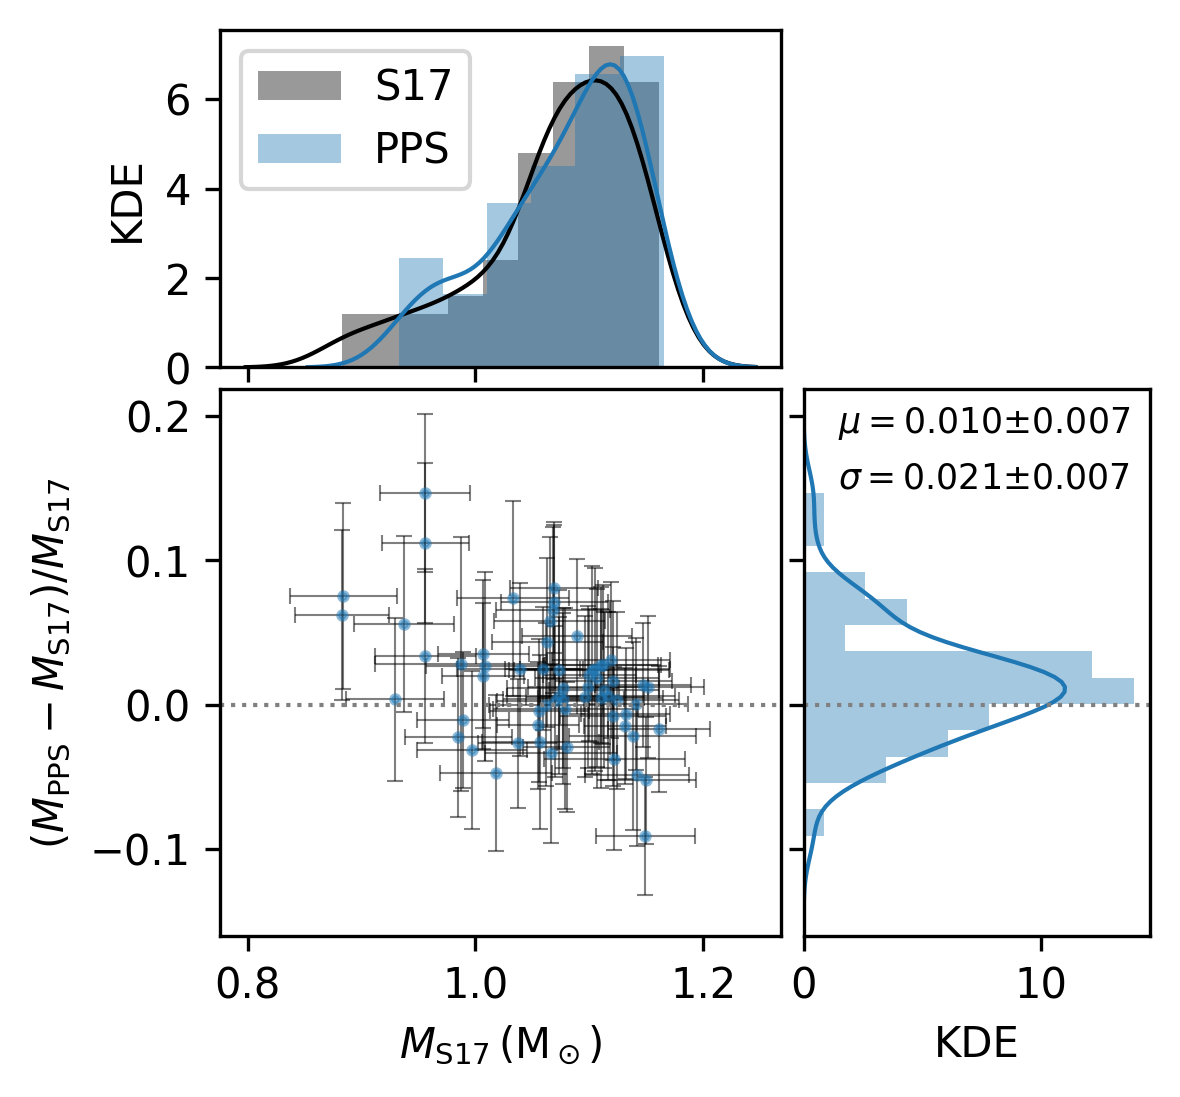

In [53]:
cols = ('Mass', 'mass_mean', 'Mass')

fig, axes = plt.subplots(2, 2, figsize=(4., 4.), dpi=300, sharey='row', sharex='col',
                        gridspec_kw={'wspace': 0.05, 'hspace': 0.05, 
                                     'width_ratios': [1.618, 1.], 'height_ratios': [1., 1.618]})

dist(*cols[:2], ax=axes[0, 0])
scatter(*cols, 'eMas', 'mass_sd', ax=axes[1, 0])
comp(*cols, ax=axes[1, 1])

axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('KDE')
axes[0, 0].legend()

axes[0, 1].remove()

ax = axes[1, 1]
ax.text(.1, .92, r'$\mu='+f'{mass.loc["mu", "mean"]:.3f}±{mass.loc["mu", "sd"]:.3f}'+'$', 
                transform=ax.transAxes, fontdict={'fontsize': 'small'})
ax.text(.1, .82, r'$\sigma='+f'{mass.loc["sigma", "mean"]:.3f}±{mass.loc["sigma", "sd"]:.3f}'+'$', 
                transform=ax.transAxes, fontdict={'fontsize': 'small'})
axes[1, 0].set_ylabel(r'$(M_\mathrm{PPS} - M_\mathrm{S17}) / M_\mathrm{S17}$')
axes[1, 0].set_xlabel(r'$M_\mathrm{S17} \, (\mathrm{M}_\odot)$')
# axes[1, 0].legend()

axes[1, 1].set_xlabel('KDE')
# axes[1, 1].legend()

fig.savefig('../paper/figures/mass_comp.png', bbox_inches='tight')

In [32]:
rad_obs, rad_err = get_y('Radius', 'rad_mean', 'Radius', 'eRad', 'rad_sd')
trace = fit_normal(rad_obs.dropna(), rad_err.dropna())
rad = pm.summary(trace, round_to='none')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_offset, sigma, mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1174.83draws/s]


In [33]:
rad.loc[['mu', 'sigma']]

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.009899,0.003063,0.004617,0.016161,0.000068,0.000048,2022.996720,2022.996720,2039.998343,1546.528100,1.001978
sigma,0.009610,0.002993,0.003953,0.014982,0.000091,0.000065,1074.237318,1074.237318,1068.772112,1311.705059,1.000769


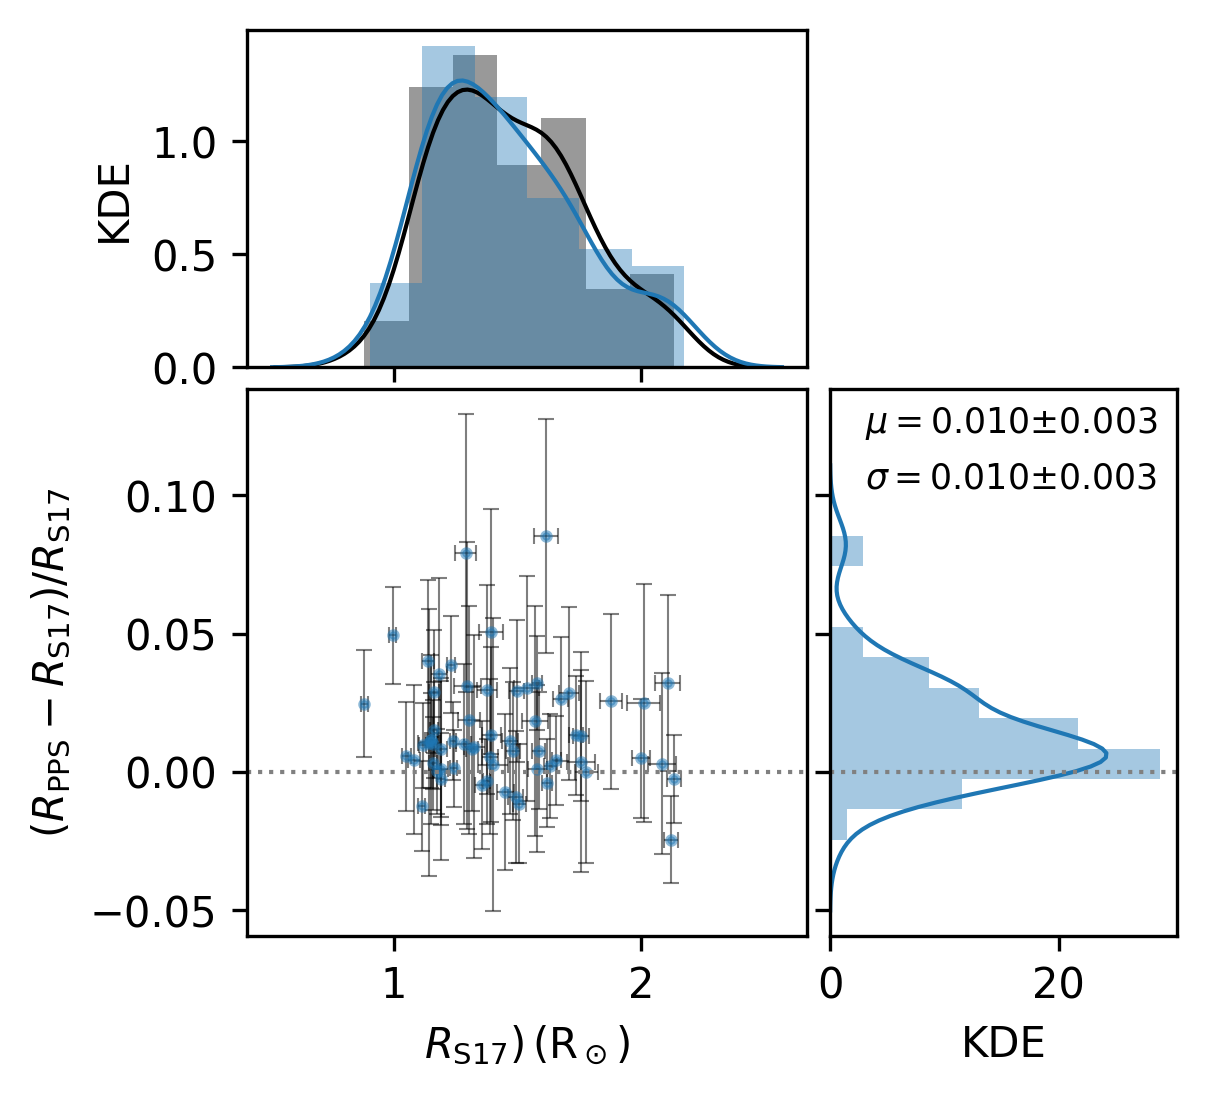

In [56]:
cols = ('Radius', 'rad_mean', 'Radius')

fig, axes = plt.subplots(2, 2, figsize=(4., 4.), dpi=300, sharey='row', sharex='col',
                        gridspec_kw={'wspace': 0.05, 'hspace': 0.05, 
                                     'width_ratios': [1.618, 1.], 'height_ratios': [1., 1.618]})

dist(*cols[:2], ax=axes[0, 0])
scatter(*cols, 'eRad', 'rad_sd', ax=axes[1, 0])
comp(*cols, ax=axes[1, 1])

axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('KDE')
# axes[0, 0].legend()

axes[0, 1].remove()

ax = axes[1, 1]
ax.text(.1, .92, r'$\mu='+f'{rad.loc["mu", "mean"]:.3f}±{rad.loc["mu", "sd"]:.3f}'+'$', 
                transform=ax.transAxes, fontdict={'fontsize': 'small'})
ax.text(.1, .82, r'$\sigma='+f'{rad.loc["sigma", "mean"]:.3f}±{rad.loc["sigma", "sd"]:.3f}'+'$', 
                transform=ax.transAxes, fontdict={'fontsize': 'small'})
axes[1, 0].set_ylabel(r'$(R_\mathrm{PPS} - R_\mathrm{S17}) / R_\mathrm{S17}$')
axes[1, 0].set_xlabel(r'$R_\mathrm{S17}) \, (\mathrm{R}_\odot)$')
# axes[1, 0].legend()

axes[1, 1].set_xlabel('KDE')
# axes[1, 1].legend()

fig.savefig('../paper/figures/rad_comp.png', bbox_inches='tight')